In [1]:
import pandas as pd
import numpy as np
import ast
import re
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


bangalore = pd.read_excel("C:/Users/Darkk/Downloads/cardheko/Dataset/bangalore_cars.xlsx")
chennai = pd.read_excel("C:/Users/Darkk/Downloads/cardheko/Dataset/chennai_cars.xlsx")
delhi = pd.read_excel("C:/Users/Darkk/Downloads/cardheko/Dataset/delhi_cars.xlsx")
hyderabad=pd.read_excel("C:/Users/Darkk/Downloads/cardheko/Dataset/hyderabad_cars.xlsx")
jaipur = pd.read_excel("C:/Users/Darkk/Downloads/cardheko/Dataset/jaipur_cars.xlsx")
kolkata = pd.read_excel("C:/Users/Darkk/Downloads/cardheko/Dataset/kolkata_cars.xlsx")

bangalore['Location']='Bangalore'
chennai['Location']='Chennai'
delhi['Location']='Delhi'
hyderabad['Location']='Hyderabad'
jaipur['Location']='Jaipur'
kolkata['Location']='Kolkata'

In [2]:
#Merging all the city cars

df_concat= pd.concat([bangalore,chennai,delhi,hyderabad,jaipur,kolkata],axis = 0)
df_concat.to_excel('C:/Users/Darkk/OneDrive/Desktop/cars/merged_car.xlsx', index=False)

In [3]:
merged_car=pd.read_excel("C:/Users/Darkk/OneDrive/Desktop/cars/merged_car.xlsx")
merged_car.head()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Location
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Bangalore
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Bangalore
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Bangalore
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Bangalore
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Bangalore


In [4]:
#Data type of each packed column
print(type(merged_car['new_car_detail'].iloc[0]))
print(type(merged_car['new_car_overview'].iloc[0]))
print(type(merged_car['new_car_feature'].iloc[0]))
print(type(merged_car['new_car_specs'].iloc[0]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [5]:
#unpacking dict to normal data

merged_car['new_car_detail'] =merged_car['new_car_detail'].apply(ast.literal_eval)
merged_car['new_car_overview'] =merged_car['new_car_overview'].apply(ast.literal_eval)
merged_car['new_car_feature'] =merged_car['new_car_feature'].apply(ast.literal_eval)
merged_car['new_car_specs'] =merged_car['new_car_specs'].apply(ast.literal_eval)

In [6]:
#Normalizing new_car_details column
nr_details=pd.json_normalize(merged_car['new_car_detail'])

In [7]:
#Normalizing new_car_overview column
def process_row(row):
    top_data={item['key']:item['value'] for item in row['top']}
    return top_data
nr_overview=merged_car['new_car_overview'].apply(lambda row: pd.Series(process_row(row)))

In [8]:
#Normalizing new_car_feature column
def process_features(row):
    features = {}
    for item in row['top']:
        features[item['value']] = True
    
    for data_item in row.get('data', []):
        for sub_item in data_item.get('list', []):
            features[sub_item['value']] = True
    
    return features

nr_features =merged_car['new_car_feature'].apply(lambda row: pd.Series(process_features(row)))

In [9]:
#Normalizing new_car_specs column
def process_specifications(row):
    specs = {}
    for item in row['top']:
        specs[item['key']] = item['value']
    
    for data_item in row.get('data', []):
        for sub_item in data_item.get('list', []):
            specs[sub_item['key']] = sub_item['value']
    
    return specs

nr_specs =merged_car['new_car_specs'].apply(lambda row: pd.Series(process_specifications(row)))

In [10]:
#Merging all normalized columns
nr_cars=pd.concat([nr_details,nr_overview,nr_features,nr_specs],axis=1)
nr_cars.to_excel('C:/Users/Darkk/OneDrive/Desktop/cars/nr_cars.xlsx', index=False)

In [11]:
nr_cars=pd.read_excel("C:/Users/Darkk/OneDrive/Desktop/cars/nr_cars.xlsx")
nr_cars.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,No Door Numbers,Cargo Volumn,Wheel Size,Alloy Wheel Size,Ground Clearance Unladen
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,...,Ventilated Disc,Drum,150 Kmph,15.05 Seconds,"Tubeless, Radial",5.0,235-litres,NaN,NaN,NaN
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,...,Ventilated Disc,Drum,NaN,NaN,"Tubeless,Radial",4.0,352-litres,16,16,NaN
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,...,Disc,Drum,150 kmph,14.3 Seconds,Tubeless,5.0,242-litres,14,14,NaN
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,...,Disc,Drum,172km/hr,14.2 Seconds,"Tubeless,Radial",4.0,407-litres,14,14,NaN
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,...,Ventilated Disc,Solid Disc,190 Kmph,12 Seconds,"Tubeless,Radial",5.0,353-litres,16,16,NaN


In [12]:
nr_cars.shape

(8369, 242)

In [13]:
nr_cars.isna().sum()

it                             0
ft                             0
bt                             4
km                             0
transmission                   0
                            ... 
No Door Numbers               11
Cargo Volumn                1593
Wheel Size                  2983
Alloy Wheel Size            2983
Ground Clearance Unladen    7854
Length: 242, dtype: int64

In [14]:
#Dropping the columns with missing values more than 50%
threshold=len(nr_cars)*0.5
nr_cars.dropna(axis=1,thresh=threshold,inplace=True)
nr_cars.shape

(8369, 121)

In [15]:
nr_cars.nunique()

it                     1
ft                     5
bt                    10
km                  4090
transmission           2
                    ... 
Tyre Type             34
No Door Numbers        5
Cargo Volumn         321
Wheel Size            17
Alloy Wheel Size      17
Length: 121, dtype: int64

In [16]:
#Dropping colimns with 1 unique value
nr_cars = nr_cars.loc[:, nr_cars.nunique() > 1]
nr_cars.shape

(8369, 58)

In [17]:
#Duplicate data
nr_cars.duplicated().sum()

np.int64(95)

In [18]:
#Dropping all duplicate rows data

nr_cars.drop_duplicates(keep='first',inplace=True)
nr_cars.duplicated().sum()

np.int64(0)

In [19]:
nr_cars.shape

(8274, 58)

In [20]:
nr_cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8274 entries, 0 to 8368
Data columns (total 58 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ft                   8274 non-null   object 
 1   bt                   8270 non-null   object 
 2   km                   8274 non-null   object 
 3   transmission         8274 non-null   object 
 4   ownerNo              8274 non-null   int64  
 5   owner                8274 non-null   object 
 6   oem                  8274 non-null   object 
 7   model                8274 non-null   object 
 8   modelYear            8274 non-null   int64  
 9   centralVariantId     8274 non-null   int64  
 10  variantName          8274 non-null   object 
 11  price                8274 non-null   object 
 12  Registration Year    8222 non-null   object 
 13  Insurance Validity   8270 non-null   object 
 14  Fuel Type            8274 non-null   object 
 15  Seats                8268 non-null   object

In [21]:
#Normalising by converting price column by removing the symbol
def convert_price(price_str):
    price_str = re.sub(r'[₹,]', '', price_str).strip()
    
    #Vonverting all to same base unit rupees
    if 'Crore' in price_str:
        price_str = price_str.replace('Crore', '').strip()
        return float(price_str) * 10000000
    elif 'Lakh' in price_str:
        price_str = price_str.replace('Lakh', '').strip()
        return float(price_str) * 100000 
    elif 'Thousand' in price_str:
        price_str = price_str.replace('Thousand', '').strip()
        return float(price_str) * 1000  
    else:
        return float(price_str)  
#New modified price  column
nr_cars['price'] = nr_cars['price'].apply(convert_price)

In [22]:
print(nr_cars['price'])

0       400000.0
1       811000.0
2       585000.0
3       462000.0
4       790000.0
          ...   
8364    510000.0
8365    180000.0
8366    550000.0
8367    140000.0
8368    500000.0
Name: price, Length: 8274, dtype: float64


In [23]:
#Normalizing column km by removing comma and to float data type.
def convert_km(km_str):
    km_str=re.sub(r',','',km_str).strip()
    return float(km_str)
nr_cars['km']=nr_cars['km'].apply(convert_km)

In [24]:
print(nr_cars['km'])

0       120000.0
1        32706.0
2        11949.0
3        17794.0
4        60000.0
          ...   
8364     10000.0
8365    120000.0
8366     50000.0
8367     40000.0
8368    120000.0
Name: km, Length: 8274, dtype: float64


In [25]:
#Normalizing column mileage
def convert_mileage(value):
    if pd.isna(value):
        return np.nan

    value = str(value).strip().lower()

    if 'km/kg' in value:
        numeric_value = re.sub(r'[^\d.]', '', value)
        numeric_value = numeric_value.rstrip('.')
        value_float = float(numeric_value)*0.74
        return value_float

    else:
        numeric_value = re.sub(r'[^\d.]', '', value)
        numeric_value = numeric_value.rstrip('.')
        value_float = float(numeric_value)
        return value_float

nr_cars['Mileage'] = nr_cars['Mileage'].apply(convert_mileage)

In [26]:
print(nr_cars['Mileage'])

0       23.10
1       17.00
2       23.84
3       19.10
4       23.65
        ...  
8364    25.24
8365    22.74
8366    11.74
8367    18.50
8368    19.72
Name: Mileage, Length: 8274, dtype: float64


In [27]:
nr_cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8274 entries, 0 to 8368
Data columns (total 58 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ft                   8274 non-null   object 
 1   bt                   8270 non-null   object 
 2   km                   8274 non-null   float64
 3   transmission         8274 non-null   object 
 4   ownerNo              8274 non-null   int64  
 5   owner                8274 non-null   object 
 6   oem                  8274 non-null   object 
 7   model                8274 non-null   object 
 8   modelYear            8274 non-null   int64  
 9   centralVariantId     8274 non-null   int64  
 10  variantName          8274 non-null   object 
 11  price                8274 non-null   float64
 12  Registration Year    8222 non-null   object 
 13  Insurance Validity   8270 non-null   object 
 14  Fuel Type            8274 non-null   object 
 15  Seats                8268 non-null   object

In [28]:
nr_cars.isna().sum()

ft                        0
bt                        4
km                        0
transmission              0
ownerNo                   0
owner                     0
oem                       0
model                     0
modelYear                 0
centralVariantId          0
variantName               0
price                     0
Registration Year        52
Insurance Validity        4
Fuel Type                 0
Seats                     6
Kms Driven                2
RTO                     873
Ownership                32
Engine Displacement       4
Transmission              0
Year of Manufacture      20
Mileage                 285
Engine                    4
Max Power                60
Torque                   60
Seats.1                   6
Color                     3
Engine Type             290
Displacement              4
Max Torque               60
No of Cylinder           31
Values per Cylinder      51
Value Configuration    2190
Fuel Suppy System      1707
Turbo Charger       

In [29]:
#droping columns which may not required for our convinence
try:
    nr_cars = nr_cars.drop(columns=['Year of Manufacture','Seats.1','Wheel Size', 'Alloy Wheel Size', 'Cargo Volumn'])
except KeyError as e:
    print("Error:", e)


In [30]:
nr_cars.isna().sum()

ft                        0
bt                        4
km                        0
transmission              0
ownerNo                   0
owner                     0
oem                       0
model                     0
modelYear                 0
centralVariantId          0
variantName               0
price                     0
Registration Year        52
Insurance Validity        4
Fuel Type                 0
Seats                     6
Kms Driven                2
RTO                     873
Ownership                32
Engine Displacement       4
Transmission              0
Mileage                 285
Engine                    4
Max Power                60
Torque                   60
Color                     3
Engine Type             290
Displacement              4
Max Torque               60
No of Cylinder           31
Values per Cylinder      51
Value Configuration    2190
Fuel Suppy System      1707
Turbo Charger          1029
Super Charger          1937
Length              

In [31]:
nr_cars['Mileage'].fillna(nr_cars['Mileage'].median(), inplace=True)
nr_cars['No of Cylinder'].fillna(nr_cars['No of Cylinder'].median(), inplace=True)
nr_cars['Seating Capacity'].fillna(nr_cars['Seating Capacity'].median(), inplace=True)
nr_cars['No Door Numbers'].fillna(nr_cars['Seating Capacity'].median(), inplace=True)

C:\Users\Darkk\AppData\Local\Temp\ipykernel_14608\2974634954.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nr_cars['Mileage'].fillna(nr_cars['Mileage'].median(), inplace=True)
C:\Users\Darkk\AppData\Local\Temp\ipykernel_14608\2974634954.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [32]:
print(nr_cars.describe())

# Calculate Z-scores and identify outliers
def identify_outliers_zscore(df, columns, z_thresh=3):
    outliers = pd.DataFrame()
    for column in columns:
        z_scores = stats.zscore(df[column])
        outliers[column] = (abs(z_scores) >= z_thresh)
    return outliers

columns_to_check = ['km', 'price', 'modelYear', 'Mileage', 'Displacement']
outliers = identify_outliers_zscore(nr_cars, columns_to_check)

# Display rows with outliers
print("\nRows with Outliers:")
print(nr_cars[outliers.any(axis=1)])

                 km      ownerNo    modelYear  centralVariantId         price  \
count  8.274000e+03  8274.000000  8274.000000       8274.000000  8.274000e+03   
mean   5.896025e+04     1.357264  2016.513778       4969.777496  9.587099e+05   
std    7.437600e+04     0.637474     3.910687       2746.551716  1.422138e+06   
min    0.000000e+00     0.000000  1985.000000          5.000000  2.016100e+04   
25%    3.000000e+04     1.000000  2014.000000       2070.500000  4.000000e+05   
50%    5.367450e+04     1.000000  2017.000000       5329.000000  6.010000e+05   
75%    8.000000e+04     2.000000  2019.000000       7121.750000  9.500000e+05   
max    5.500000e+06     5.000000  2023.000000      11098.000000  4.150000e+07   

           Mileage  Displacement  No of Cylinder  Values per Cylinder  \
count  8274.000000   8270.000000     8274.000000          8223.000000   
mean     19.221687   1423.881137        3.802514             3.935060   
std       3.917646    476.674553        0.593216   

In [33]:
# Remove outliers in the numerical columns using z-score
# Function to remove outliers using Z-score
def remove_outliers_zscore(df, columns, z_thresh=3):
        for column in columns:
        # Calculate Z-scores
            z_scores = stats.zscore(df[column])
        
        # Filter out the outliers
            df = df[(abs(z_scores) < z_thresh)]
    
        return df

# Apply the function to the DataFrame
columns_to_check = ['km','price','modelYear','Mileage','Displacement']
nr_cars_zscore_outlier = remove_outliers_zscore(nr_cars, columns_to_check)
nr_cars_zscore_outlier.shape

(7829, 53)

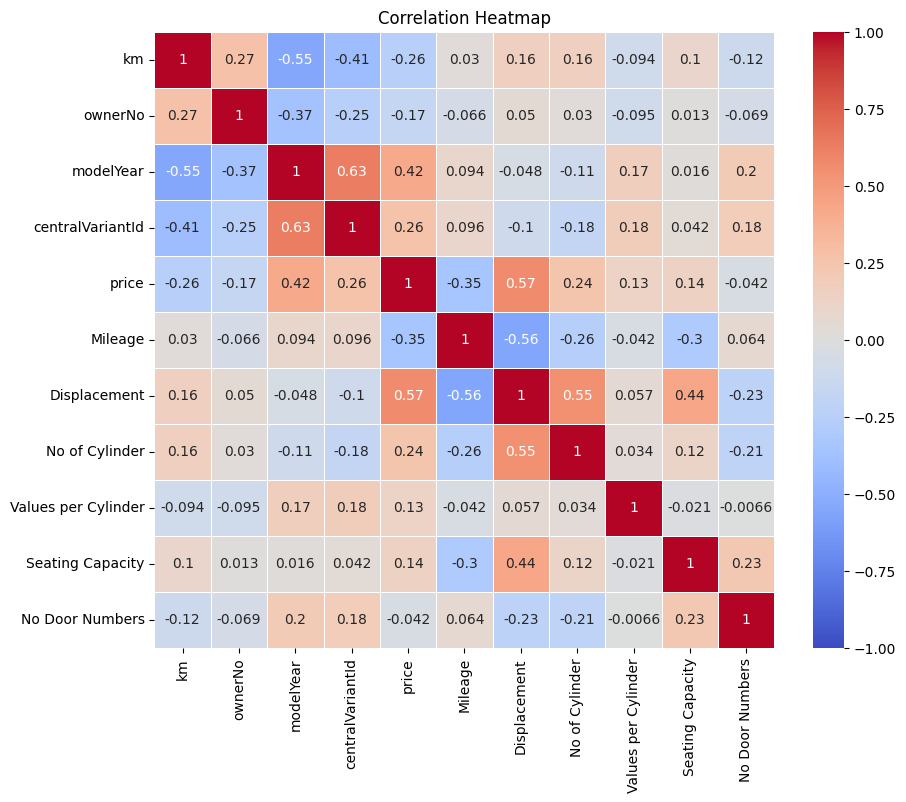

Correlation with 'price':
km                    -0.256226
ownerNo               -0.168823
modelYear              0.421753
centralVariantId       0.258069
price                  1.000000
Mileage               -0.347395
Displacement           0.565494
No of Cylinder         0.244772
Values per Cylinder    0.125121
Seating Capacity       0.138256
No Door Numbers       -0.041859
Name: price, dtype: float64


In [34]:

# heatmap for numerical columns

numeric_df = nr_cars_zscore_outlier.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Extract the correlation with 'price'
correlation_with_price = correlation_matrix['price']

# Print the correlation matrix with 'price'
print("Correlation with 'price':")
print(correlation_with_price)

C:\Users\Darkk\AppData\Local\Temp\ipykernel_14608\2130660546.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_price.index, y=correlation_with_price.values, palette='viridis')


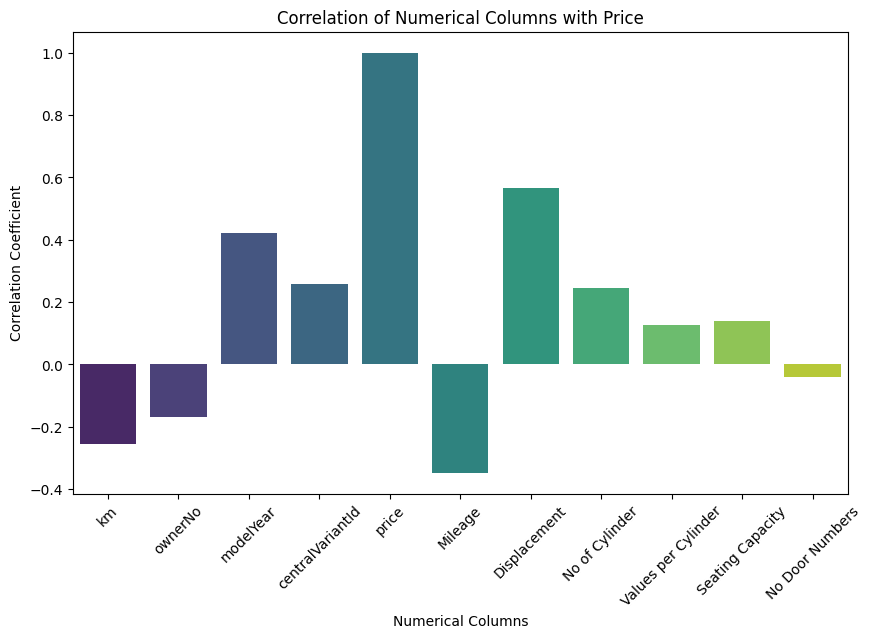

In [35]:

plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_price.index, y=correlation_with_price.values, palette='viridis')
plt.title('Correlation of Numerical Columns with Price')
plt.xlabel('Numerical Columns')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()

In [36]:
# dropping columns not required according to co-relation with price but can keep ownerNo as it makes sense

nr_cars_zscore_outlier.drop(['No Door Numbers','Values per Cylinder','bt','Turning Radius','Value Configuration','Engine Displacement','Torque','Max Torque','Transmission','Registration Year', 'Ownership','No of Cylinder', 'Values per cylinder','owner'], axis=1, inplace=True, errors='ignore')

nr_cars_zscore_outlier.head()

,ft,km,transmission,ownerNo,oem,model,modelYear,centralVariantId,variantName,price,...,Kerb Weight,Gear Box,Drive Type,Seating Capacity,Steering Type,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type
0,Petrol,120000.0,Manual,3,Maruti,Maruti Celerio,2015,3979,VXI,400000.0,...,835kg,5 Speed,FWD,5.0,Power,Ventilated Disc,Drum,150 Kmph,15.05 Seconds,"Tubeless, Radial"
1,Petrol,32706.0,Manual,2,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,811000.0,...,1242Kg,5 Speed,FWD,5.0,Power,Ventilated Disc,Drum,NaN,NaN,"Tubeless,Radial"
2,Petrol,11949.0,Manual,1,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,585000.0,...,1012kg,5 Speed,FWD,5.0,Power,Disc,Drum,150 kmph,14.3 Seconds,Tubeless
3,Petrol,17794.0,Manual,1,Hyundai,Hyundai Xcent,2014,1867,1.2 Kappa S Option,462000.0,...,1180,5 Speed,FWD,5.0,Power,Disc,Drum,172km/hr,14.2 Seconds,"Tubeless,Radial"
4,Diesel,60000.0,Manual,1,Maruti,Maruti SX4 S Cross,2015,4277,DDiS 200 Zeta,790000.0,...,1230Kg,5 Speed,FWD,5.0,Power,Ventilated Disc,Solid Disc,190 Kmph,12 Seconds,"Tubeless,Radial"


In [37]:
nr_cars_zscore_outlier.iloc[0]


ft                                   Petrol
km                                 120000.0
transmission                         Manual
ownerNo                                   3
oem                                  Maruti
model                        Maruti Celerio
modelYear                              2015
centralVariantId                       3979
variantName                             VXI
price                              400000.0
Insurance Validity    Third Party insurance
Fuel Type                            Petrol
Seats                               5 Seats
Kms Driven                     1,20,000 Kms
RTO                                    KA51
Mileage                                23.1
Engine                               998 CC
Max Power                  67.04bhp@6000rpm
Color                                 White
Engine Type                     K10B Engine
Displacement                          998.0
Fuel Suppy System                      MPFi
Turbo Charger                   

In [38]:
nr_cars_zscore_outlier.isna().sum()

ft                       0
km                       0
transmission             0
ownerNo                  0
oem                      0
model                    0
modelYear                0
centralVariantId         0
variantName              0
price                    0
Insurance Validity       4
Fuel Type                0
Seats                    5
Kms Driven               2
RTO                    822
Mileage                  0
Engine                   0
Max Power               40
Color                    0
Engine Type            233
Displacement             0
Fuel Suppy System     1590
Turbo Charger          957
Super Charger         1810
Length                  55
Width                   55
Height                  55
Wheel Base             130
Front Tread           3344
Rear Tread            3349
Kerb Weight             40
Gear Box                59
Drive Type            1453
Seating Capacity         0
Steering Type          230
Front Brake Type        61
Rear Brake Type         61
T

In [39]:
rto_group_mapping = {
    'KA': 'Karnataka',
    'HR': 'Haryana',
    'WB': 'West Bengal',
    'TN': 'Tamil Nadu',
    'UP': 'Uttar Pradesh',
    'DL': 'Delhi',
    'MH': 'Maharashtra',
    'RJ': 'Rajasthan',
    'AP': 'Andhra Pradesh',
    'GJ': 'Gujarat',
    'OR': 'Odisha',
    'PY': 'Puducherry',
    'Unknown': 'Unknown'
}

# Function to map RTO values
def map_rto(rto):
    if pd.isna(rto):
        return 'Unknown'
    rto_str = str(rto)  # Convert value to string
    for key in rto_group_mapping:
        if rto_str.startswith(key):
            return rto_group_mapping[key]
    return 'Unknown'

# Convert float values to 'Unknown'
nr_cars_zscore_outlier['RTO'] = nr_cars_zscore_outlier['RTO'].fillna('Unknown')

# Apply the function to the DataFrame
nr_cars_zscore_outlier['RTO_grouped'] = nr_cars_zscore_outlier['RTO'].apply(map_rto)
nr_cars_zscore_outlier.drop('RTO',axis=1,inplace=True)
nr_cars_zscore_outlier.head()

,ft,km,transmission,ownerNo,oem,model,modelYear,centralVariantId,variantName,price,...,Gear Box,Drive Type,Seating Capacity,Steering Type,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,RTO_grouped
0,Petrol,120000.0,Manual,3,Maruti,Maruti Celerio,2015,3979,VXI,400000.0,...,5 Speed,FWD,5.0,Power,Ventilated Disc,Drum,150 Kmph,15.05 Seconds,"Tubeless, Radial",Karnataka
1,Petrol,32706.0,Manual,2,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,811000.0,...,5 Speed,FWD,5.0,Power,Ventilated Disc,Drum,NaN,NaN,"Tubeless,Radial",Karnataka
2,Petrol,11949.0,Manual,1,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,585000.0,...,5 Speed,FWD,5.0,Power,Disc,Drum,150 kmph,14.3 Seconds,Tubeless,Karnataka
3,Petrol,17794.0,Manual,1,Hyundai,Hyundai Xcent,2014,1867,1.2 Kappa S Option,462000.0,...,5 Speed,FWD,5.0,Power,Disc,Drum,172km/hr,14.2 Seconds,"Tubeless,Radial",Karnataka
4,Diesel,60000.0,Manual,1,Maruti,Maruti SX4 S Cross,2015,4277,DDiS 200 Zeta,790000.0,...,5 Speed,FWD,5.0,Power,Ventilated Disc,Solid Disc,190 Kmph,12 Seconds,"Tubeless,Radial",Karnataka


In [40]:
print(nr_cars_zscore_outlier['Engine Type'].head())
print(nr_cars_zscore_outlier['Engine Type'].isna().sum())
print(nr_cars_zscore_outlier['Engine Type'].value_counts())
nr_cars_zscore_outlier.drop('Engine Type',axis=1,inplace=True)

0                 K10B Engine
1        Ti-VCT Petrol Engine
2             Revotron Engine
3    Kappa VTVT Petrol Engine
4      DDiS 200 Diesel Engine
Name: Engine Type, dtype: object
233
Engine Type
In-Line Engine               437
Kappa VTVT Petrol Engine     424
Petrol Engine                309
i-VTEC Petrol Engine         266
i VTEC Engine                199
                            ... 
2.0 L Turbocharged Diesel      1
TDi Diesel Engine              1
mDI CRDe Diesel Engine         1
 Petrol Engine                 1
2AR-FE Petrol Engine           1
Name: count, Length: 447, dtype: int64


In [41]:
print(nr_cars['variantName'])

0                            VXI
1       1.5 Petrol Titanium BSIV
2                1.2 Revotron XZ
3             1.2 Kappa S Option
4                  DDiS 200 Zeta
                  ...           
8364                    ZXI BSVI
8365                         LXI
8366          C 200 CGI Elegance
8367                         ZXi
8368        110PS Diesel RxZ AWD
Name: variantName, Length: 8274, dtype: object


In [42]:
nr_cars_zscore_outlier.drop(['variantName','Turbo Charger','Gear Box','Super Charger','Fuel Supply System'], axis=1, inplace=True, errors='ignore')

nr_cars_zscore_outlier.head()

,ft,km,transmission,ownerNo,oem,model,modelYear,centralVariantId,price,Insurance Validity,...,Kerb Weight,Drive Type,Seating Capacity,Steering Type,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,RTO_grouped
0,Petrol,120000.0,Manual,3,Maruti,Maruti Celerio,2015,3979,400000.0,Third Party insurance,...,835kg,FWD,5.0,Power,Ventilated Disc,Drum,150 Kmph,15.05 Seconds,"Tubeless, Radial",Karnataka
1,Petrol,32706.0,Manual,2,Ford,Ford Ecosport,2018,6087,811000.0,Comprehensive,...,1242Kg,FWD,5.0,Power,Ventilated Disc,Drum,NaN,NaN,"Tubeless,Radial",Karnataka
2,Petrol,11949.0,Manual,1,Tata,Tata Tiago,2018,2983,585000.0,Comprehensive,...,1012kg,FWD,5.0,Power,Disc,Drum,150 kmph,14.3 Seconds,Tubeless,Karnataka
3,Petrol,17794.0,Manual,1,Hyundai,Hyundai Xcent,2014,1867,462000.0,Comprehensive,...,1180,FWD,5.0,Power,Disc,Drum,172km/hr,14.2 Seconds,"Tubeless,Radial",Karnataka
4,Diesel,60000.0,Manual,1,Maruti,Maruti SX4 S Cross,2015,4277,790000.0,Third Party insurance,...,1230Kg,FWD,5.0,Power,Ventilated Disc,Solid Disc,190 Kmph,12 Seconds,"Tubeless,Radial",Karnataka


In [43]:
print(nr_cars_zscore_outlier['Steering Type'].value_counts())

Steering Type
Power         5978
Electric      1370
Electronic     102
Manual          69
Electrical      41
power           29
EPAS             9
electric         1
Name: count, dtype: int64


In [44]:
nr_cars_zscore_outlier['Steering Type'] = nr_cars_zscore_outlier['Steering Type'].replace({
    # Combined Power steering to power
    'Power': 'Power',
    'power': 'Power',
    'Electric': 'Power',
    'electric': 'Power',
    'Electronic': 'Power', 
    'Electrical': 'Power', 
    'EPAS': 'Power',
    'Manual': 'Manual',
    
})
print(nr_cars_zscore_outlier['Steering Type'].value_counts())

Steering Type
Power     7530
Manual      69
Name: count, dtype: int64


In [45]:
#droping bot front and back breaks 
nr_cars_zscore_outlier.drop(['Front Brake Type','Rear Brake Type','Insurance Validity','centralVariantId'], axis=1, inplace=True, errors='ignore')


In [46]:
nr_cars_zscore_outlier.head()

,ft,km,transmission,ownerNo,oem,model,modelYear,price,Fuel Type,Seats,...,Front Tread,Rear Tread,Kerb Weight,Drive Type,Seating Capacity,Steering Type,Top Speed,Acceleration,Tyre Type,RTO_grouped
0,Petrol,120000.0,Manual,3,Maruti,Maruti Celerio,2015,400000.0,Petrol,5 Seats,...,1420mm,1410mm,835kg,FWD,5.0,Power,150 Kmph,15.05 Seconds,"Tubeless, Radial",Karnataka
1,Petrol,32706.0,Manual,2,Ford,Ford Ecosport,2018,811000.0,Petrol,5 Seats,...,NaN,NaN,1242Kg,FWD,5.0,Power,NaN,NaN,"Tubeless,Radial",Karnataka
2,Petrol,11949.0,Manual,1,Tata,Tata Tiago,2018,585000.0,Petrol,5 Seats,...,1400mm,1420mm,1012kg,FWD,5.0,Power,150 kmph,14.3 Seconds,Tubeless,Karnataka
3,Petrol,17794.0,Manual,1,Hyundai,Hyundai Xcent,2014,462000.0,Petrol,5 Seats,...,1479mm,1493mm,1180,FWD,5.0,Power,172km/hr,14.2 Seconds,"Tubeless,Radial",Karnataka
4,Diesel,60000.0,Manual,1,Maruti,Maruti SX4 S Cross,2015,790000.0,Diesel,5 Seats,...,NaN,NaN,1230Kg,FWD,5.0,Power,190 Kmph,12 Seconds,"Tubeless,Radial",Karnataka


In [47]:
nr_cars_zscore_outlier.drop(['model','Fuel Suppy System','ft','Max Power','Wheel Base','Front Tread','Kerb Weight','Kms Driven','Width','Length','Height','Rear Tread','Acceleration','Top Speed'], axis=1, inplace=True, errors='ignore')

In [48]:
print(nr_cars_zscore_outlier['Drive Type'].value_counts())

Drive Type
FWD                                  5367
RWD                                   333
AWD                                   165
2WD                                   149
4WD                                    68
4X2                                    67
2 WD                                   46
4X4                                    41
Front Wheel Drive                      40
FWD                                    34
4x2                                    18
Two Wheel Drive                        15
4x4                                    11
All Wheel Drive                         7
Rear Wheel Drive with ESP               6
RWD(with MTT)                           5
Permanent all-wheel drive quattro       2
2WD                                     1
4 WD                                    1
Name: count, dtype: int64


In [49]:
nr_cars_zscore_outlier.drop(['Drive Type','Tyre Type'], axis=1, inplace=True, errors='ignore')

In [50]:
nr_cars_zscore_outlier.to_excel('C:/Users/Darkk/OneDrive/Desktop/cars/final_car.xlsx', index=False)